In [89]:
import numpy as np
import matplotlib.pyplot as plt

def get_S3(lattice, fNut, fDt, fLambt, c, a, b, g111a, g111b, g12, g03):
    S3= np.zeros(fNut.shape)
    for i in range(1, n_shell-1):
        S3[:, i] = (lattice[i]*(a[:, i]*fDt[:, i]*fDt[:, i+1]*fNut[:, i-1] + \
            b[:, i]*fDt[:, i-1]*fDt[:, i+1]*fNut[:, i] + \
            c[:, i]*fDt[:, i-1]*fDt[:, i]*fNut[:, i+1]))/(4.*fNut[:, i-1]*fNut[:, i]*fNut[:, i+1]*(\
            fLambt[:, i-1]*fLambt[:, i+1]*fNut[:, i] + fLambt[:, i]*(fLambt[:, i+1]*fNut[:, i-1] + \
            fLambt[:, i-1]*fNut[:, i+1])))
    return S3

f0 = np.loadtxt('output/f.dat', delimiter='\t')
n_shell = 81
k0 = 8E-20
lamb = 2

lattice = np.array([k0*lamb**(i) for i in range(n_shell)])
fnu = f0[:,:n_shell]
fd = f0[:,n_shell:2*n_shell]
flamb = f0[:,2*n_shell:3*n_shell]
c = f0[:,3*n_shell:4*n_shell]
a = f0[:,4*n_shell:5*n_shell]
b = f0[:,5*n_shell:6*n_shell]
gam111a = f0[:,6*n_shell:7*n_shell]
gam111b = f0[:,7*n_shell:8*n_shell]
gam12 = f0[:,8*n_shell:9*n_shell]
gam03 = f0[:,9*n_shell:10*n_shell]
gam22b = f0[:,10*n_shell:11*n_shell]
gam22a = f0[:,11*n_shell:12*n_shell]
gam31 = f0[:,12*n_shell:13*n_shell]
gam13 = f0[:,13*n_shell:14*n_shell]
gam04 = f0[:,14*n_shell:15*n_shell]


S2 = fd/(2*fnu*flamb)
S3 = get_S3(lattice, fnu, fd, flamb, c, a, b, gam111b, gam111a, gam12, gam12)
S4 = -((fd**2*(fnu* (2*gam22a + gam22b) + 
    fd* gam31))/(8*flamb**3* fnu**4))



/tmp/ipykernel_8744/237582699.py:37: RuntimeWarning: divide by zero encountered in true_divide
  S2 = fd/(2*fnu*flamb)
/tmp/ipykernel_8744/237582699.py:37: RuntimeWarning: invalid value encountered in true_divide
  S2 = fd/(2*fnu*flamb)
/tmp/ipykernel_8744/237582699.py:7: RuntimeWarning: invalid value encountered in true_divide
  S3[:, i] = (lattice[i]*(a[:, i]*fDt[:, i]*fDt[:, i+1]*fNut[:, i-1] + \
/tmp/ipykernel_8744/237582699.py:9: RuntimeWarning: invalid value encountered in multiply
  c[:, i]*fDt[:, i-1]*fDt[:, i]*fNut[:, i+1]))/(4.*fNut[:, i-1]*fNut[:, i]*fNut[:, i+1]*(\
/tmp/ipykernel_8744/237582699.py:7: RuntimeWarning: overflow encountered in multiply
  S3[:, i] = (lattice[i]*(a[:, i]*fDt[:, i]*fDt[:, i+1]*fNut[:, i-1] + \
/tmp/ipykernel_8744/237582699.py:7: RuntimeWarning: invalid value encountered in multiply
  S3[:, i] = (lattice[i]*(a[:, i]*fDt[:, i]*fDt[:, i+1]*fNut[:, i-1] + \
/tmp/ipykernel_8744/237582699.py:8: RuntimeWarning: invalid value encountered in multiply
  b[:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


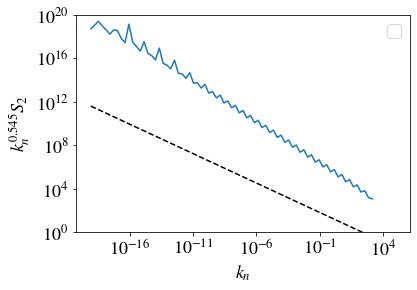

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import matplotlib as mpl

mpl.rc('xtick', labelsize=18)
mpl.rc('ytick', labelsize=18)
mpl.rc('legend', fontsize=18)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.loglog(lattice, abs(S2[-1].T))
#plt.loglog(S2_leonie[:, 0], S2_leonie[:, 1]*S2_leonie[:, 0]**(0.545), label=r'Léonie')

plt.loglog(lattice, 20*lattice**(-0.54), 'k--')
plt.ylabel(r'$k_n^{0.545}S_2$', fontsize=18)
plt.xlabel(r'$k_n$',fontsize=18)
plt.legend()
plt.ylim([1e0, 1e20])

plt.savefig('S2_compensated.pdf')

-0.7497581558690095 -1.1141697956490122 -1.515836318673415


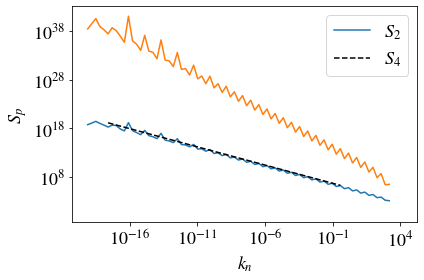

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import matplotlib as mpl

rng = slice(5, 63)

(a2, b2) = np.polyfit(np.log(lattice[rng]), np.log(abs(S2[-1, rng])), 1)
(a3, b3) = np.polyfit(np.log(lattice[rng]), np.log(abs(S3[-1, rng])), 1)
(a4, b4) = np.polyfit(np.log(lattice[rng]), np.log(abs(S4[-1, rng])), 1)



mpl.rc('xtick', labelsize=18)
mpl.rc('ytick', labelsize=18)
mpl.rc('legend', fontsize=18)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.loglog(lattice, S2[-1], label = r'$S_2$')
#plt.loglog(lattice, abs(S3[-1]), label = r'$S_3$')
plt.loglog(lattice, abs(S4[-1]))
plt.loglog(lattice[rng], np.exp(a2*np.log(lattice[rng])+b2+.5), 'k--', label = r'$S_4$')



plt.ylabel(r'$S_p$', fontsize=18)
plt.xlabel(r'$k_n$',fontsize=18)
plt.legend()
#plt.ylim([1E-10, 1E15])


print(a2, a3, a4)

plt.tight_layout()
plt.savefig("S_p.pdf")

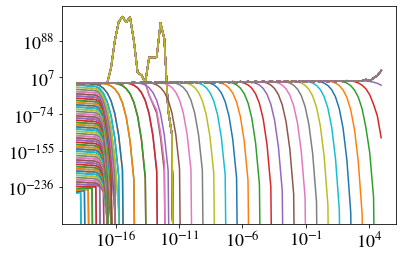

In [92]:
plt.loglog(lattice, np.abs(gam111a.T))
#plt.loglog(lattice, (lattice/lattice[0])**(1/3))

#plt.ylim([10**(0), 10**(10)])


In [138]:
gam31[-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])